## Feature Exploration
This notebook demos how to use %ml features to generate featureset class, and how to use datalab.ml.DataSet to analyze and visualize your data.

Analysis of the feature data will provide insights of data, such that: <br>

1. Find correlations of features so you know which features should be included in training. This is especially useful in linear models.
2. Spot outliers of data and evaluate the data quality. Important if you have data from different sources with unknown accuracy.
3. Decide how to preprocess the data. Based on the value distribution, you may decide instead of using raw value, use scaling, log, or bucketized transformation.

Copy the data to local. Note that '/content' is mapped to host disk, so these files will persist even if you shut down your Datalab and restart it.

In [1]:
!mkdir -p /content/datalab/ml/census
!gsutil cp gs://cloud-datalab/sampledata/ml/census/data_train.csv /content/datalab/tmp/ml/census/data_train.csv
!gsutil cp gs://cloud-datalab/sampledata/ml/census/data_eval.csv /content/datalab/tmp/ml/census/data_eval.csv

Copying gs://cloud-datalab/sampledata/ml/census/data_train.csv...
Copying gs://cloud-datalab/sampledata/ml/census/data_eval.csv...


### Define Dataset
If you don't know how to start with, just run "%ml features" and it will generate the cell template for you to fill out.

In [ ]:
%ml features

You will see output like:<br><br>
%ml features<br>
path: REQUIRED_Fill_In_Gcs_or_Local_Path<br>
headers: List_Of_Column_Names_Seperated_By_Comma<br>
target: REQUIRED_Fill_In_Name_Or_Index_Of_Target_Column<br>
id: Fill_In_Name_Or_Index_Of_Id_Column<br><br>

Fill in the required fields.

In [ ]:
%ml features
path: /content/datalab/tmp/ml/census/data_train.csv
headers: SERIALNO,PUMA,NP,ACCESS,ACR,AGS,BATH,BDSP,BLD,BROADBND,BUS,COMPOTHX,CONP,DIALUP,DSL,ELEP,FIBEROP,FS,FULP,GASP,HANDHELD,HFL,INSP,LAPTOP,MHP,MODEM,MRGI,MRGP,MRGT,MRGX,OTHSVCEX,REFR,RMSP,RNTM,RNTP,RWAT,SATELLITE,SINK,SMP,STOV,TEL,TEN,TOIL,VALP,VEH,WATP,YBL,FES,FPARC,GRNTP,HHL,HHT,HINCP,HUGCL,HUPAC,HUPAOC,HUPARC,KIT,LNGI,MULTG,MV,NOC,NPF,NPP,NR,NRC,PARTNER,PLM,PSF,R18,R60,R65,RESMODE,SMOCP,SMX,SRNT,SSMC,SVAL,TAXP,WIF,WKEXREL,WORKSTAT
target: HINCP
id: SERIALNO


After running above, you should see a generated featureset class. We will make some changes on it for demo purposes: <br><br>
class CsvFeatures -> class CensusFeatures <br>
attrs = -> inputs = <br>
HINCP = -> target = <br>
SERIALNO = -> key = <br>
...and then run the cell.

In [1]:
import google.cloud.ml.features as features

class CensusFeatures(object):
  """This class is generated from command line:
        %ml features
        path: /content/datalab/tmp/ml/census/data_train.csv
        headers: SERIALNO,PUMA,NP,ACCESS,ACR,AGS,BATH,BDSP,BLD,BROADBND,BUS,COMPOTHX,CONP,DIALUP,DSL,ELEP,FIBEROP,FS,FULP,GASP,HANDHELD,HFL,INSP,LAPTOP,MHP,MODEM,MRGI,MRGP,MRGT,MRGX,OTHSVCEX,REFR,RMSP,RNTM,RNTP,RWAT,SATELLITE,SINK,SMP,STOV,TEL,TEN,TOIL,VALP,VEH,WATP,YBL,FES,FPARC,GRNTP,HHL,HHT,HINCP,HUGCL,HUPAC,HUPAOC,HUPARC,KIT,LNGI,MULTG,MV,NOC,NPF,NPP,NR,NRC,PARTNER,PLM,PSF,R18,R60,R65,RESMODE,SMOCP,SMX,SRNT,SSMC,SVAL,TAXP,WIF,WKEXREL,WORKSTAT
        target: HINCP
        id: SERIALNO
        Please modify it as appropriate!!!
  """
  csv_columns = ('SERIALNO','PUMA','NP','ACCESS','ACR','AGS','BATH','BDSP','BLD','BROADBND','BUS','COMPOTHX','CONP','DIALUP','DSL','ELEP','FIBEROP','FS','FULP','GASP','HANDHELD','HFL','INSP','LAPTOP','MHP','MODEM','MRGI','MRGP','MRGT','MRGX','OTHSVCEX','REFR','RMSP','RNTM','RNTP','RWAT','SATELLITE','SINK','SMP','STOV','TEL','TEN','TOIL','VALP','VEH','WATP','YBL','FES','FPARC','GRNTP','HHL','HHT','HINCP','HUGCL','HUPAC','HUPAOC','HUPARC','KIT','LNGI','MULTG','MV','NOC','NPF','NPP','NR','NRC','PARTNER','PLM','PSF','R18','R60','R65','RESMODE','SMOCP','SMX','SRNT','SSMC','SVAL','TAXP','WIF','WKEXREL','WORKSTAT')
  target = features.target('HINCP').continuous()
  key = features.key('SERIALNO')
  inputs = [
      features.numeric('CONP').identity(),
      features.numeric('WATP').identity(),
      features.numeric('FS').identity(),
      features.numeric('SMX').identity(),
      features.numeric('PSF').identity(),
      features.numeric('STOV').identity(),
      features.numeric('MULTG').identity(),
      features.numeric('WKEXREL').identity(),
      features.numeric('BATH').identity(),
      features.numeric('INSP').identity(),
      features.numeric('ACR').identity(),
      features.numeric('NPF').identity(),
      features.numeric('YBL').identity(),
      features.numeric('HFL').identity(),
      features.numeric('TAXP').identity(),
      features.numeric('GASP').identity(),
      features.numeric('GRNTP').identity(),
      features.numeric('MODEM').identity(),
      features.numeric('AGS').identity(),
      features.numeric('FIBEROP').identity(),
      features.numeric('RESMODE').identity(),
      features.numeric('SATELLITE').identity(),
      features.numeric('DIALUP').identity(),
      features.numeric('TEL').identity(),
      features.numeric('TEN').identity(),
      features.numeric('R18').identity(),
      features.numeric('BUS').identity(),
      features.numeric('HUPAC').identity(),
      features.numeric('SMOCP').identity(),
      features.numeric('HANDHELD').identity(),
      features.numeric('HUPARC').identity(),
      features.numeric('ELEP').identity(),
      features.numeric('RMSP').identity(),
      features.numeric('R60').identity(),
      features.numeric('VEH').identity(),
      features.numeric('NP').identity(),
      features.numeric('NR').identity(),
      features.numeric('SRNT').identity(),
      features.numeric('RNTM').identity(),
      features.numeric('OTHSVCEX').identity(),
      features.numeric('RNTP').identity(),
      features.numeric('MRGI').identity(),
      features.numeric('WIF').identity(),
      features.numeric('LAPTOP').identity(),
      features.numeric('REFR').identity(),
      features.numeric('TOIL').identity(),
      features.numeric('DSL').identity(),
      features.numeric('FPARC').identity(),
      features.numeric('MRGX').identity(),
      features.numeric('FES').identity(),
      features.numeric('HHT').identity(),
      features.numeric('MRGT').identity(),
      features.numeric('BLD').identity(),
      features.numeric('SMP').identity(),
      features.numeric('MRGP').identity(),
      features.numeric('WORKSTAT').identity(),
      features.numeric('MHP').identity(),
      features.numeric('FULP').identity(),
      features.numeric('HUGCL').identity(),
      features.numeric('SSMC').identity(),
      features.numeric('PUMA').identity(),
      features.numeric('LNGI').identity(),
      features.numeric('VALP').identity(),
      features.numeric('NRC').identity(),
      features.numeric('BDSP').identity(),
      features.numeric('HUPAOC').identity(),
      features.numeric('KIT').identity(),
      features.numeric('ACCESS').identity(),
      features.numeric('R65').identity(),
      features.numeric('NOC').identity(),
      features.numeric('MV').identity(),
      features.numeric('COMPOTHX').identity(),
      features.numeric('SVAL').identity(),
      features.numeric('RWAT').identity(),
      features.numeric('BROADBND').identity(),
      features.numeric('PARTNER').identity(),
      features.numeric('PLM').identity(),
      features.numeric('HHL').identity(),
      features.numeric('NPP').identity(),
      features.numeric('SINK').identity(),
  ]


Can we analyze the data directly? It is a bit too much for in-memory analysis.

In [3]:
!wc -l /content/datalab/tmp/ml/census/data_train.csv
!wc -l /content/datalab/tmp/ml/census/data_eval.csv

24903 /content/datalab/tmp/ml/census/data_train.csv
2767 /content/datalab/tmp/ml/census/data_eval.csv


We can sample the training data to 3000 instances. Note that you can sample it directly from the GCS path.

In [2]:
import datalab

csv = datalab.data.Csv('/content/datalab/tmp/ml/census/data_train.csv')
csv.sample_to(3000, True, 'LOCAL', '/content/datalab/tmp/ml/census/data_train_sampled.csv')

### Analyze

Once we have the feature set class defined and data sampled, we can use datalab.ml.DataSet class to analyze the data. Note that: data visualizations created by 'analyze()' method are created out of preprocessed data. How the data is preprocessed is defined in the featureset class. For example, "features.numeric('column1').identity()" means using the raw value. "features.numeric('column2').max_abs_scale(1)" means scale the data into [-1, 1] range.

Alternatively, you can also use '%ml dataset' magic to define your dataset.

In [3]:
ds = datalab.ml.DataSet(CensusFeatures(),
                        {'train': '/content/datalab/tmp/ml/census/data_train_sampled.csv',
                         'eval': '/content/datalab/tmp/ml/census/data_eval.csv'})

If you plot without specifying "columns", it will plot all numeric columns, and in this case there are too many.

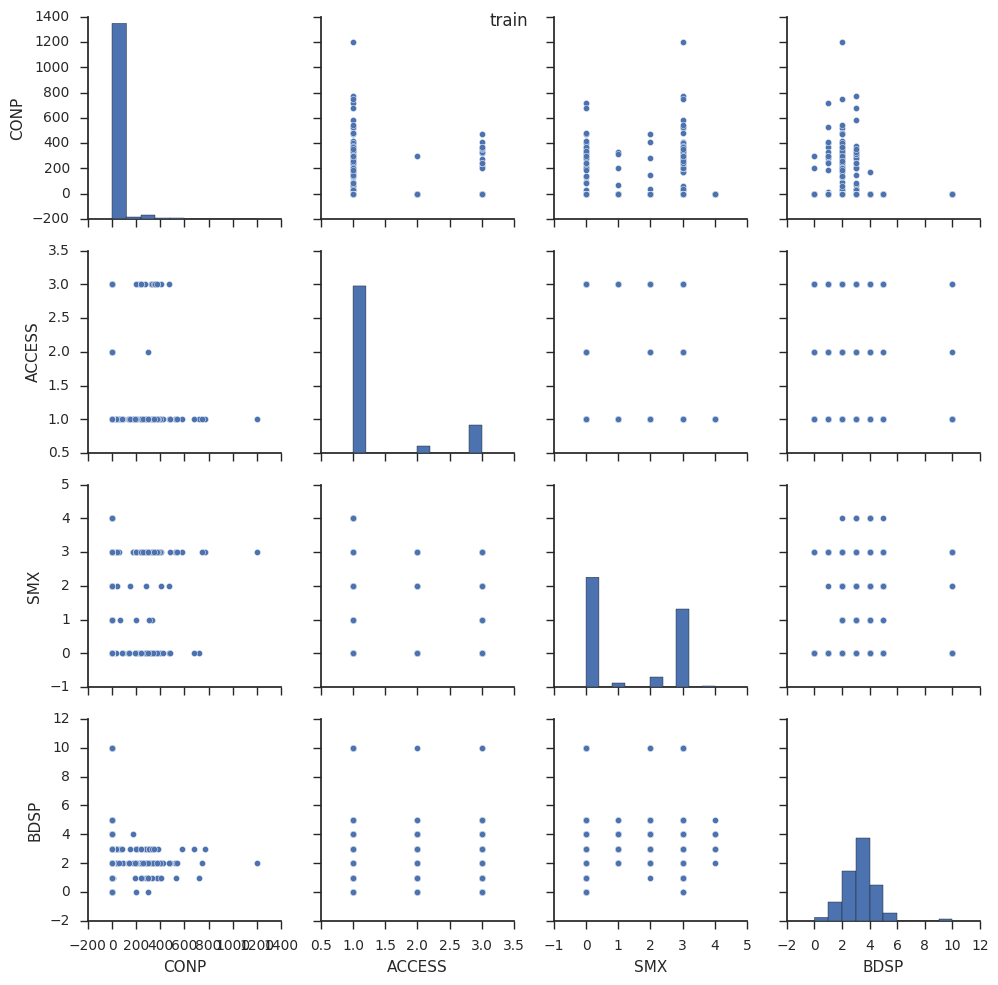

In [7]:
ds.plot(names=['train'], columns=['CONP', 'ACCESS', 'SMX', 'BDSP'])

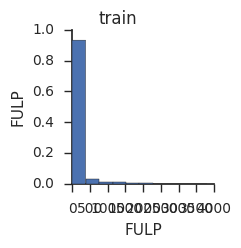

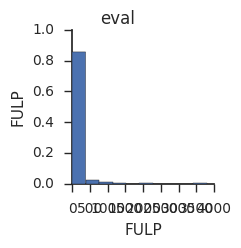

In [10]:
ds.plot(columns=['FULP'])

Analyze one column 'CONP'. It plots one histogram and one scatter plot with target column. Since in featureset class we choose 'identity()' transform, the raw values will be used directly.

In [12]:
ds.analyze(columns=['FULP'])

We can also analyze two columns. It creates scatter plot with the two features, and color is used for target classes.

In [13]:
ds.analyze(columns=['CONP', 'WATP'])

Three columns.

In [14]:
ds.analyze(columns=['CONP', 'WATP', 'ACCESS'])

If you call analyze() with no columns, it shows you a profile on raw data. Note that it will take a while since it needs to scan all data.

In [17]:
ds.profile(names=['train'])

Number of variables,82
Number of observations,3000
Total Missing (%),13.7%
Total size in memory,1.9 MiB
Average record size in memory,656.0 B
Numeric,68
Categorical,0
Date,0
Text (Unique),1
Rejected,13
Distinct count,3
